# DSC 540 Term Project Scroggins Jonathon

## Milestone 2 begins here

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import urllib3
import matplotlib.pyplot as plt
import re
from operator import itemgetter
import openpyxl

In [2]:
#import csv file
books_df = pd.read_csv('books.csv', error_bad_lines=False, index_col=0)
books_df.head()

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [3]:
books_df['title'] = books_df['title'].str.replace(r"\(.*\)","")

### *Added the error bad lines phrase to skip the ones that do not have the correct number of entries. Seeing that it only skipped 4 entries, I am ok with that and will continue on*

In [4]:
books_df.describe()

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [5]:
books_df.dtypes

title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
  num_pages             int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

#### *When trying to look for outliers of the number of pages, I was having trouble getting the num_pages to work, after looking at the dtypes, I noticed that there was two spaces in the header. Need to rename that header to make easier to call*

In [6]:
#renaming header for num_pages
books_df.rename(columns={'  num_pages':'num_pages'}, inplace=True)
books_df.dtypes

title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

In [7]:
books_df.title.describe()

count                      11123
unique                     10304
top       The Brothers Karamazov
freq                           9
Name: title, dtype: object

### *Dropped the duplicates of any titles*

In [8]:
#dropping duplicates of book titles
books_df = books_df.drop_duplicates(subset = ['title'])
books_df.title.describe()

count                   10304
unique                  10304
top       The Tangled Thread 
freq                        1
Name: title, dtype: object

### *My initial idea was to make the language code a value instead of a text string, however, there seem to be a good amount of unique language values, so I am going to see the frequency of the other languages*

In [9]:
books_df['language_code'].describe()

count     10304
unique       26
top         eng
freq       8246
Name: language_code, dtype: object

In [10]:
books_df['language_code'].value_counts()

eng      8246
en-US    1312
spa       200
en-GB     189
fre       133
ger        94
jpn        45
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
ara         1
gla         1
wel         1
msa         1
srp         1
nl          1
glg         1
nor         1
tur         1
Name: language_code, dtype: int64

### *For the sake of this project I am going to drop the languages that are not eng. This will drop the "outliers" for language codes.*

In [11]:
books_df = books_df[(books_df.language_code == 'eng')]
books_df.shape

(8246, 11)

### *Making all entries lowercase*

In [12]:
#making all of the book titles, author's name and publisher lowercase to help with consistency
def lowercase(x):
    try:
        x = x.str.lower()
    except:
        pass
    return x
books_df = books_df.apply(lowercase)

### *Removing punctuation*

In [13]:
#removing punctuation from the same columns
def remove_punctuation(x):
    try:
        x = x.str.replace('[^\w\s]', ' ')
    except:
        pass
    return x
books_df = books_df.apply(remove_punctuation)

In [14]:
books_df.head()

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
1,harry potter and the half blood prince,j k rowling mary grandpré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9 16 2006,scholastic inc
2,harry potter and the order of the phoenix,j k rowling mary grandpré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9 1 2004,scholastic inc
4,harry potter and the chamber of secrets,j k rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11 1 2003,scholastic
5,harry potter and the prisoner of azkaban,j k rowling mary grandpré,4.56,043965548x,9780439655484,eng,435,2339585,36325,5 1 2004,scholastic inc
8,harry potter boxed set books 1 5,j k rowling mary grandpré,4.78,0439682584,9780439682589,eng,2690,41428,164,9 13 2004,scholastic


### *Checking for outliers in the page numbers (looking for box sets or complete sagas will have larger page numbers most likely) and the ratings*

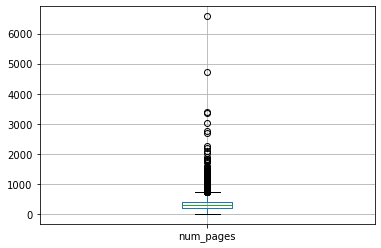

In [15]:
books_df.boxplot(column=['num_pages'])
plt.show()

In [16]:
#looking at what would be an outlier at this range
books_df_outliers = books_df[(books_df['num_pages'] > 2500)]
books_df_outliers

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
8,harry potter boxed set books 1 5,j k rowling mary grandpré,4.78,0439682584,9780439682589,eng,2690,41428,164,9 13 2004,scholastic
10,harry potter collection,j k rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9 12 2005,scholastic
24520,the complete aubrey maturin novels,patrick o brian,4.70,039306011x,9780393060119,eng,6576,1338,81,10 17 2004,w w norton company
25587,the second world war,winston s churchill john keegan,4.45,039541685x,9780395416853,eng,4736,1493,99,5 9 1986,mariner books
25709,summa theologica 5 vols,thomas aquinas,4.12,0870610635,9780870610639,eng,3020,2734,84,1 1 1981,christian classics
30258,harrison s principles of internal medicine,dennis l kasper dan l longo stephen l hause...,4.35,0071391401,9780071391405,eng,2751,23,4,7 27 2004,mcgraw hill medical publishing
44613,remembrance of things past,marcel proust c k scott moncrieff frederick a...,4.34,0701125594,9780701125592,eng,3400,6,1,3 5 1981,chatto windus


#### * Looking at the dataframe above, I feel l can take out those rows. That should take out the sets of books and leave the single books. I first looked at 2000 but that would have taken out a few of the single books as well, so I settled on this range*

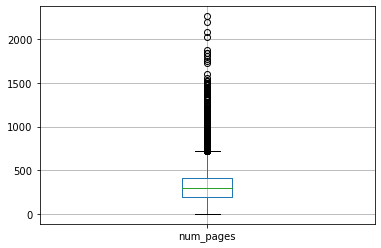

In [17]:
books_df = books_df[(books_df['num_pages'] <= 2500)]
books_df.boxplot(column=['num_pages'])
plt.show()

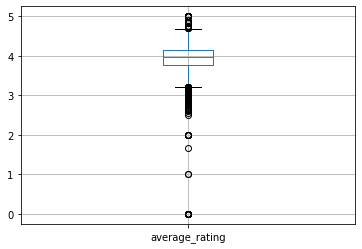

In [18]:
books_df.boxplot(column = ['average_rating'])
plt.show()

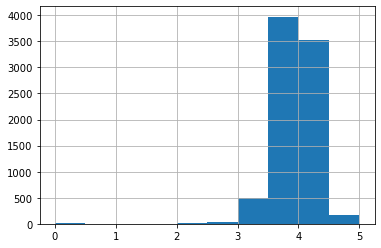

In [19]:
books_df.average_rating.hist()
plt.show()

In [20]:
books_df.shape

(8239, 11)

In [21]:
path = 'books.xlsx'
with pd.ExcelWriter(path) as writer:
    books_df.to_excel(writer)

*In a normal analysis, I would probably cut down some of the lower rated books as outliers, however, because I am planning at this point to just make a database, I do not want to cut out any books from this list, unlike the books I took out before*

### Milestone 3 begins here

In [22]:
#import Newberry medal winners
books_new = (r'https://www.goodreads.com/list/show/1863.Newbery_Medal_Honor_Books')
books_new_html = urllib3.PoolManager()
books_new_res = books_new_html.request('GET', books_new)
books_new_data = books_new_res.data
books_new_soup = BeautifulSoup(books_new_data)

In [23]:
#checking the amount of tables
books_new_tables = books_new_soup.findAll('table')
len(books_new_tables)

1

In [24]:
#finding subsection with data for table
books_new_data = books_new_soup.findAll('tr')

In [25]:
#check the length to make sure got all books
len(books_new_data)

100

In [26]:
#making into data frame
books_new_data_df = [[td.getText() for td in tr.findAll('a')] for tr in books_new_data]

In [27]:
#making headers for the dataframe so I can have the same headers for large dataframe and drop unecessary columns
headers = ['a', 'title', 'authors', 'b', 'c', 'd', 'e', 'f', 'g', 'h']

In [28]:
books_new_data_df = pd.DataFrame(books_new_data_df, columns= headers)

In [29]:
#Stripping the \n from title column
books_new_data_df['title'] = books_new_data_df['title'].str.strip()

In [30]:
#some titles had things like (book #1) and I wanted to get rid of that for larger dataframe and to not duplicate same book
books_new_data_df['title'] = books_new_data_df['title'].str.replace(r"\(.*\)","")

In [31]:
books_new_data_df.head()

,a,title,authors,b,c,d,e,f,g,h
0,\n\n,Charlotte's Web,E.B. White,"score: 14,938",151 people voted,1 of 5 stars,2 of 5 stars,3 of 5 stars,4 of 5 stars,5 of 5 stars
1,\n\n,Ella Enchanted,Gail Carson Levine,"score: 10,236",105 people voted,1 of 5 stars,2 of 5 stars,3 of 5 stars,4 of 5 stars,5 of 5 stars
2,\n\n,Because of Winn-Dixie,Kate DiCamillo,"score: 7,904",81 people voted,1 of 5 stars,2 of 5 stars,3 of 5 stars,4 of 5 stars,5 of 5 stars
3,\n\n,Hatchet,Gary Paulsen,"score: 5,670",59 people voted,1 of 5 stars,2 of 5 stars,3 of 5 stars,4 of 5 stars,5 of 5 stars
4,\n\n,"Ramona Quimby, Age 8",Beverly Cleary,"score: 5,417",57 people voted,1 of 5 stars,2 of 5 stars,3 of 5 stars,4 of 5 stars,5 of 5 stars


In [32]:
#dropping unnecesary columns
books_new_data_df = books_new_data_df.drop(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], axis = 1)

In [33]:
#making variable for award winner, the 1 signifies it won the award
books_new_data_df['newberry award winner'] = 1
books_new_data_df.head()

,title,authors,newberry award winner
0,Charlotte's Web,E.B. White,1
1,Ella Enchanted,Gail Carson Levine,1
2,Because of Winn-Dixie,Kate DiCamillo,1
3,Hatchet,Gary Paulsen,1
4,"Ramona Quimby, Age 8",Beverly Cleary,1


*Repeating the same code for multiple dataframes from different webpages for different awards*

In [34]:
#import Caldecott winners
books_cal = (r'https://www.goodreads.com/list/show/311.Caldecott_Medal_Winners')
books_cal_html = urllib3.PoolManager()
books_cal_res = books_cal_html.request('GET', books_cal)
books_cal_data = books_cal_res.data
books_cal_soup = BeautifulSoup(books_cal_data)

In [35]:
books_cal_tables = books_cal_soup.findAll('table')

In [36]:
books_cal_data = books_cal_soup.findAll('tr')

In [37]:
books_cal_data_df = [[td.getText() for td in tr.findAll('a')] for tr in books_cal_data]

In [38]:
books_cal_data_df = pd.DataFrame(books_cal_data_df, columns= headers)

In [39]:
books_cal_data_df['title'] = books_cal_data_df['title'].str.strip()

In [40]:
books_cal_data_df.head()

,a,title,authors,b,c,d,e,f,g,h
0,\n\n,Where the Wild Things Are,Maurice Sendak,"score: 20,763",211 people voted,1 of 5 stars,2 of 5 stars,3 of 5 stars,4 of 5 stars,5 of 5 stars
1,\n\n,Make Way for Ducklings,Robert McCloskey,"score: 12,597",131 people voted,1 of 5 stars,2 of 5 stars,3 of 5 stars,4 of 5 stars,5 of 5 stars
2,\n\n,"The Snowy Day (Peter, #1)",Ezra Jack Keats,"score: 12,513",130 people voted,1 of 5 stars,2 of 5 stars,3 of 5 stars,4 of 5 stars,5 of 5 stars
3,\n\n,The Polar Express,Chris Van Allsburg,"score: 9,062",95 people voted,1 of 5 stars,2 of 5 stars,3 of 5 stars,4 of 5 stars,5 of 5 stars
4,\n\n,The Little House,Virginia Lee Burton,"score: 7,574",80 people voted,1 of 5 stars,2 of 5 stars,3 of 5 stars,4 of 5 stars,5 of 5 stars


In [41]:
books_cal_data_df = books_cal_data_df.drop(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], axis = 1)

In [42]:
books_cal_data_df['caldecott award winner'] = 1
books_cal_data_df.head()

,title,authors,caldecott award winner
0,Where the Wild Things Are,Maurice Sendak,1
1,Make Way for Ducklings,Robert McCloskey,1
2,"The Snowy Day (Peter, #1)",Ezra Jack Keats,1
3,The Polar Express,Chris Van Allsburg,1
4,The Little House,Virginia Lee Burton,1


In [43]:
#import Newberry medal winners column 2 and prep dataframe
books_new2 = (r'https://www.goodreads.com/list/show/1863.Newbery_Medal_Honor_Books?page=2')
books_new2_html = urllib3.PoolManager()
books_new2_res = books_new2_html.request('GET', books_new2)
books_new2_data = books_new2_res.data
books_new2_soup = BeautifulSoup(books_new2_data)
books_new2_tables = books_new2_soup.findAll('table')
books_new2_data = books_new2_soup.findAll('tr')
books_new2_data_df = [[td.getText() for td in tr.findAll('a')] for tr in books_new2_data]
headers = ['a', 'title', 'authors', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
books_new2_data_df = pd.DataFrame(books_new2_data_df, columns= headers)
books_new2_data_df['title'] = books_new2_data_df['title'].str.strip()
books_new2_data_df['title'] = books_new2_data_df['title'].str.replace(r"\(.*\)","")
books_new2_data_df = books_new2_data_df.drop(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], axis = 1)
books_new2_data_df['newberry award winner'] = 1
books_new2_data_df.head()

,title,authors,newberry award winner
0,26 Fairmount Avenue,Tomie dePaola,1
1,Belle Prater's Boy,Ruth White,1
2,The Black Pearl,Scott O'Dell,1
3,A String in the Harp,Nancy Bond,1
4,Joey Pigza Loses Control,Jack Gantos,1


In [44]:
#import Newberry medal winners column 3 and prep dataframe
books_new3 = (r'https://www.goodreads.com/list/show/1863.Newbery_Medal_Honor_Books?page=3')
books_new3_html = urllib3.PoolManager()
books_new3_res = books_new3_html.request('GET', books_new3)
books_new3_data = books_new3_res.data
books_new3_soup = BeautifulSoup(books_new3_data)
books_new3_tables = books_new3_soup.findAll('table')
books_new3_data = books_new3_soup.findAll('tr')
books_new3_data_df = [[td.getText() for td in tr.findAll('a')] for tr in books_new3_data]
headers = ['a', 'title', 'authors', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
books_new3_data_df = pd.DataFrame(books_new3_data_df, columns= headers)
books_new3_data_df['title'] = books_new3_data_df['title'].str.strip()
books_new3_data_df['title'] = books_new3_data_df['title'].str.replace(r"\(.*\)","")
books_new3_data_df = books_new3_data_df.drop(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], axis = 1)
books_new3_data_df['newberry award winner'] = 1
books_new3_data_df.head()

,title,authors,newberry award winner
0,Volcano: The Eruption and Healing of Mount Sai...,Patricia Lauber,1
1,The Loner,Ester Wier,1
2,The Avion My Uncle Flew,Cyrus Fisher,1
3,The Dark Star of Itza: The Story of a Pagan Pr...,Alida Sims Malkus,1
4,Nicholas: A Manhattan Christmas Story,Anne Carroll Moore,1


In [45]:
#import Newberry medal winners column 4 and prep dataframe
books_new4 = (r'https://www.goodreads.com/list/show/1863.Newbery_Medal_Honor_Books?page=4')
books_new4_html = urllib3.PoolManager()
books_new4_res = books_new4_html.request('GET', books_new4)
books_new4_data = books_new4_res.data
books_new4_soup = BeautifulSoup(books_new4_data)
books_new4_tables = books_new4_soup.findAll('table')
books_new4_data = books_new4_soup.findAll('tr')
books_new4_data_df = [[td.getText() for td in tr.findAll('a')] for tr in books_new4_data]
headers = ['a', 'title', 'authors', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
books_new4_data_df = pd.DataFrame(books_new4_data_df, columns= headers)
books_new4_data_df['title'] = books_new4_data_df['title'].str.strip()
books_new4_data_df['title'] = books_new4_data_df['title'].str.replace(r"\(.*\)","")
books_new4_data_df = books_new4_data_df.drop(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], axis = 1)
books_new4_data_df['newberry award winner'] = 1
books_new4_data_df.head()

,title,authors,newberry award winner
0,The Secret River,Marjorie Kinnan Rawlings,1
1,Glory of the Seas,Agnes Danforth Hewes,1
2,The Fearsome Inn,Isaac Bashevis Singer,1
3,New Land: A Novel for Boys and Girls,Sarah Lindsay Schmidt,1
4,Frontier Living: An Illustrated Guide to Pione...,Edwin Tunis,1


In [46]:
#making one large df for newberry winners
books_new_df = pd.concat([books_new_data_df, books_new2_data_df, books_new3_data_df, books_new4_data_df])
books_new_df.head()

,title,authors,newberry award winner
0,Charlotte's Web,E.B. White,1
1,Ella Enchanted,Gail Carson Levine,1
2,Because of Winn-Dixie,Kate DiCamillo,1
3,Hatchet,Gary Paulsen,1
4,"Ramona Quimby, Age 8",Beverly Cleary,1


In [47]:
books_new_df.shape

(325, 3)

In [48]:
#import Pulitzer prize winner for Fiction and prep dataframe
books_pul_fict = (r'https://www.goodreads.com/list/show/4656')
books_pul_fict_html = urllib3.PoolManager()
books_pul_fict_res = books_pul_fict_html.request('GET', books_pul_fict)
books_pul_fict_data = books_pul_fict_res.data
books_pul_fict_soup = BeautifulSoup(books_pul_fict_data)
books_pul_fict_tables = books_pul_fict_soup.findAll('table')
books_pul_fict_data = books_pul_fict_soup.findAll('tr')
books_pul_fict_data_df = [[td.getText() for td in tr.findAll('a')] for tr in books_pul_fict_data]
headers = ['a', 'title', 'authors', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
books_pul_fict_data_df = pd.DataFrame(books_pul_fict_data_df, columns= headers)
books_pul_fict_data_df['title'] = books_pul_fict_data_df['title'].str.strip()
books_pul_fict_data_df['title'] = books_pul_fict_data_df['title'].str.replace(r"\(.*\)","")
books_pul_fict_data_df = books_pul_fict_data_df.drop(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], axis = 1)
books_pul_fict_data_df['Pulitzer prize winner for Fiction'] = 1
books_pul_fict_data_df.head()

,title,authors,Pulitzer prize winner for Fiction
0,To Kill a Mockingbird,Harper Lee,1
1,The Grapes of Wrath,John Steinbeck,1
2,Gone with the Wind,Margaret Mitchell,1
3,The Road,Cormac McCarthy,1
4,All the Light We Cannot See,Anthony Doerr,1


In [49]:
#import Pulitzer prize winner for Non-Fiction and prep dataframe
books_pul_nfict = (r'https://www.goodreads.com/list/show/215')
books_pul_nfict_html = urllib3.PoolManager()
books_pul_nfict_res = books_pul_nfict_html.request('GET', books_pul_nfict)
books_pul_nfict_data = books_pul_nfict_res.data
books_pul_nfict_soup = BeautifulSoup(books_pul_nfict_data)
books_pul_nfict_tables = books_pul_nfict_soup.findAll('table')
books_pul_nfict_data = books_pul_nfict_soup.findAll('tr')
books_pul_nfict_data_df = [[td.getText() for td in tr.findAll('a')] for tr in books_pul_nfict_data]
headers = ['a', 'title', 'authors', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
books_pul_nfict_data_df = pd.DataFrame(books_pul_nfict_data_df, columns= headers)
books_pul_nfict_data_df['title'] = books_pul_nfict_data_df['title'].str.strip()
books_pul_nfict_data_df['title'] = books_pul_nfict_data_df['title'].str.replace(r"\(.*\)","")
books_pul_nfict_data_df = books_pul_nfict_data_df.drop(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], axis = 1)
books_pul_nfict_data_df['Pulitzer prize winner for Non-Fiction'] = 1
books_pul_nfict_data_df.head()

,title,authors,Pulitzer prize winner for Non-Fiction
0,"Guns, Germs, and Steel: The Fates of Human Soc...",Jared Diamond,1
1,The Looming Tower: Al-Qaeda and the Road to 9/11,Lawrence Wright,1
2,The Guns of August,Barbara W. Tuchman,1
3,The Making of the Atomic Bomb,Richard Rhodes,1
4,"The Prize: The Epic Quest for Oil, Money, and ...",Daniel Yergin,1


In [50]:
#import Pulitzer prize winner for Poetry and prep dataframe
books_pul_poet = (r'https://www.goodreads.com/list/show/173')
books_pul_poet_html = urllib3.PoolManager()
books_pul_poet_res = books_pul_poet_html.request('GET', books_pul_poet)
books_pul_poet_data = books_pul_poet_res.data
books_pul_poet_soup = BeautifulSoup(books_pul_poet_data)
books_pul_poet_tables = books_pul_poet_soup.findAll('table')
books_pul_poet_data = books_pul_poet_soup.findAll('tr')
books_pul_poet_data_df = [[td.getText() for td in tr.findAll('a')] for tr in books_pul_poet_data]
headers = ['a', 'title', 'authors', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
books_pul_poet_data_df = pd.DataFrame(books_pul_poet_data_df, columns= headers)
books_pul_poet_data_df['title'] = books_pul_poet_data_df['title'].str.strip()
books_pul_poet_data_df['title'] = books_pul_poet_data_df['title'].str.replace(r"\(.*\)","")
books_pul_poet_data_df = books_pul_poet_data_df.drop(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], axis = 1)
books_pul_poet_data_df['Pulitzer prize winner for Poetry'] = 1
books_pul_poet_data_df.head()

,title,authors,Pulitzer prize winner for Poetry
0,The Collected Poems,Wallace Stevens,1
1,The Waking: Poems: 1933 - 1953,Theodore Roethke,1
2,The Collected Poems,Sylvia Plath,1
3,The Wild Iris,Louise Glück,1
4,77 Dream Songs,John Berryman,1


In [51]:
#import Pulitzer prize winner for Drama and prep dataframe
books_pul_drama = (r'https://www.goodreads.com/list/show/21407.Pulitzer_Prize_for_Drama')
books_pul_drama_html = urllib3.PoolManager()
books_pul_drama_res = books_pul_drama_html.request('GET', books_pul_drama)
books_pul_drama_data = books_pul_drama_res.data
books_pul_drama_soup = BeautifulSoup(books_pul_drama_data)
books_pul_drama_tables = books_pul_drama_soup.findAll('table')
books_pul_drama_data = books_pul_drama_soup.findAll('tr')
books_pul_drama_data_df = [[td.getText() for td in tr.findAll('a')] for tr in books_pul_drama_data]
headers = ['a', 'title', 'authors', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
books_pul_drama_data_df = pd.DataFrame(books_pul_drama_data_df, columns= headers)
books_pul_drama_data_df['title'] = books_pul_drama_data_df['title'].str.strip()
books_pul_drama_data_df['title'] = books_pul_drama_data_df['title'].str.replace(r"\(.*\)","")
books_pul_drama_data_df = books_pul_drama_data_df.drop(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], axis = 1)
books_pul_drama_data_df['Pulitzer prize winner for drama'] = 1
books_pul_drama_data_df.head()

,title,authors,Pulitzer prize winner for drama
0,A Streetcar Named Desire,Tennessee Williams,1
1,Cat on a Hot Tin Roof,Tennessee Williams,1
2,Our Town,Thornton Wilder,1
3,Death of a Salesman,Arthur Miller,1
4,Millennium Approaches,Tony Kushner,1


In [52]:
#import Bram Strokers award winner and prep dataframe
books_pul_Bram = (r'https://www.goodreads.com/list/show/679.Bram_Stoker_Award_Winners')
books_pul_Bram_html = urllib3.PoolManager()
books_pul_Bram_res = books_pul_Bram_html.request('GET', books_pul_Bram)
books_pul_Bram_data = books_pul_Bram_res.data
books_pul_Bram_soup = BeautifulSoup(books_pul_Bram_data)
books_pul_Bram_tables = books_pul_Bram_soup.findAll('table')
books_pul_Bram_data = books_pul_Bram_soup.findAll('tr')
books_pul_Bram_data_df = [[td.getText() for td in tr.findAll('a')] for tr in books_pul_Bram_data]
headers = ['a', 'title', 'authors', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
books_pul_Bram_data_df = pd.DataFrame(books_pul_Bram_data_df, columns= headers)
books_pul_Bram_data_df['title'] = books_pul_Bram_data_df['title'].str.strip()
books_pul_Bram_data_df['title'] = books_pul_Bram_data_df['title'].str.replace(r"\(.*\)","")
books_pul_Bram_data_df = books_pul_Bram_data_df.drop(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], axis = 1)
books_pul_Bram_data_df['Bram Strokers award winner'] = 1
books_pul_Bram_data_df.head()

,title,authors,Bram Strokers award winner
0,Misery,Stephen King,1
1,American Gods,Neil Gaiman,1
2,The Silence of the Lambs,Thomas Harris,1
3,Swan Song,Robert R. McCammon,1
4,Boy's Life,Robert R. McCammon,1


In [53]:
#import Pulitzer prize winner for biograpies and prep dataframe
books_pul_bio = (r'https://www.goodreads.com/list/show/214.Pulitzer_Winners_Biographies_Autobiographies')
books_pul_bio_html = urllib3.PoolManager()
books_pul_bio_res = books_pul_bio_html.request('GET', books_pul_bio)
books_pul_bio_data = books_pul_bio_res.data
books_pul_bio_soup = BeautifulSoup(books_pul_bio_data)
books_pul_bio_tables = books_pul_bio_soup.findAll('table')
books_pul_bio_data = books_pul_bio_soup.findAll('tr')
books_pul_bio_data_df = [[td.getText() for td in tr.findAll('a')] for tr in books_pul_bio_data]
headers = ['a', 'title', 'authors', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
books_pul_bio_data_df = pd.DataFrame(books_pul_bio_data_df, columns= headers)
books_pul_bio_data_df['title'] = books_pul_bio_data_df['title'].str.strip()
books_pul_bio_data_df['title'] = books_pul_bio_data_df['title'].str.replace(r"\(.*\)","")
books_pul_bio_data_df = books_pul_bio_data_df.drop(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], axis = 1)
books_pul_bio_data_df['Pulitzer prize winner for biographies'] = 1
books_pul_bio_data_df.head()

,title,authors,Pulitzer prize winner for biographies
0,John Adams,David McCullough,1
1,Angela's Ashes,Frank McCourt,1
2,Truman,David McCullough,1
3,The Rise of Theodore Roosevelt,Edmund Morris,1
4,Master of the Senate,Robert A. Caro,1


In [54]:
#import Pulitzer prize winner for history and prep dataframe
books_pul_hist = (r'https://www.goodreads.com/list/show/4249.Pulitzer_Winners_History')
books_pul_hist_html = urllib3.PoolManager()
books_pul_hist_res = books_pul_hist_html.request('GET', books_pul_hist)
books_pul_hist_data = books_pul_hist_res.data
books_pul_hist_soup = BeautifulSoup(books_pul_hist_data)
books_pul_hist_tables = books_pul_hist_soup.findAll('table')
books_pul_hist_data = books_pul_hist_soup.findAll('tr')
books_pul_hist_data_df = [[td.getText() for td in tr.findAll('a')] for tr in books_pul_hist_data]
headers = ['a', 'title', 'authors', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
books_pul_hist_data_df = pd.DataFrame(books_pul_hist_data_df, columns= headers)
books_pul_hist_data_df['title'] = books_pul_hist_data_df['title'].str.strip()
books_pul_hist_data_df['title'] = books_pul_hist_data_df['title'].str.replace(r"\(.*\)","")
books_pul_hist_data_df = books_pul_hist_data_df.drop(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], axis = 1)
books_pul_hist_data_df['Pulitzer prize winner for history'] = 1
books_pul_hist_data_df.head()

,title,authors,Pulitzer prize winner for history
0,Battle Cry of Freedom,James M. McPherson,1
1,Founding Brothers: The Revolutionary Generation,Joseph J. Ellis,1
2,An Army at Dawn: The War in North Africa,Rick Atkinson,1
3,What Hath God Wrought: The Transformation of A...,Daniel Walker Howe,1
4,No Ordinary Time: Franklin and Eleanor Rooseve...,Doris Kearns Goodwin,1


#### *merging the dataframes*

In [55]:
books_df_web = pd.merge(books_new_df, books_cal_data_df, how="outer", on=['title', 'authors'])
books_df_web.head()

,title,authors,newberry award winner,caldecott award winner
0,Charlotte's Web,E.B. White,1.0,NaN
1,Ella Enchanted,Gail Carson Levine,1.0,NaN
2,Because of Winn-Dixie,Kate DiCamillo,1.0,NaN
3,Hatchet,Gary Paulsen,1.0,NaN
4,"Ramona Quimby, Age 8",Beverly Cleary,1.0,NaN


In [56]:
books_df_web.shape

(408, 4)

In [57]:
books_df_web = pd.merge(books_df_web, books_pul_fict_data_df, how="outer", on=['title', 'authors'])
books_df_web.head()

,title,authors,newberry award winner,caldecott award winner,Pulitzer prize winner for Fiction
0,Charlotte's Web,E.B. White,1.0,NaN,NaN
1,Ella Enchanted,Gail Carson Levine,1.0,NaN,NaN
2,Because of Winn-Dixie,Kate DiCamillo,1.0,NaN,NaN
3,Hatchet,Gary Paulsen,1.0,NaN,NaN
4,"Ramona Quimby, Age 8",Beverly Cleary,1.0,NaN,NaN


In [58]:
books_df_web = pd.merge(books_df_web, books_pul_nfict_data_df, how="outer", on=['title', 'authors'])
books_df_web.head()

,title,authors,newberry award winner,caldecott award winner,Pulitzer prize winner for Fiction,Pulitzer prize winner for Non-Fiction
0,Charlotte's Web,E.B. White,1.0,NaN,NaN,NaN
1,Ella Enchanted,Gail Carson Levine,1.0,NaN,NaN,NaN
2,Because of Winn-Dixie,Kate DiCamillo,1.0,NaN,NaN,NaN
3,Hatchet,Gary Paulsen,1.0,NaN,NaN,NaN
4,"Ramona Quimby, Age 8",Beverly Cleary,1.0,NaN,NaN,NaN


In [59]:
books_df_web = pd.merge(books_df_web, books_pul_poet_data_df, how="outer", on=['title', 'authors'])
books_df_web.head()

,title,authors,newberry award winner,caldecott award winner,Pulitzer prize winner for Fiction,Pulitzer prize winner for Non-Fiction,Pulitzer prize winner for Poetry
0,Charlotte's Web,E.B. White,1.0,NaN,NaN,NaN,NaN
1,Ella Enchanted,Gail Carson Levine,1.0,NaN,NaN,NaN,NaN
2,Because of Winn-Dixie,Kate DiCamillo,1.0,NaN,NaN,NaN,NaN
3,Hatchet,Gary Paulsen,1.0,NaN,NaN,NaN,NaN
4,"Ramona Quimby, Age 8",Beverly Cleary,1.0,NaN,NaN,NaN,NaN


In [60]:
books_df_web = pd.merge(books_df_web, books_pul_drama_data_df, how="outer", on=['title', 'authors'])
books_df_web.head()

,title,authors,newberry award winner,caldecott award winner,Pulitzer prize winner for Fiction,Pulitzer prize winner for Non-Fiction,Pulitzer prize winner for Poetry,Pulitzer prize winner for drama
0,Charlotte's Web,E.B. White,1.0,NaN,NaN,NaN,NaN,NaN
1,Ella Enchanted,Gail Carson Levine,1.0,NaN,NaN,NaN,NaN,NaN
2,Because of Winn-Dixie,Kate DiCamillo,1.0,NaN,NaN,NaN,NaN,NaN
3,Hatchet,Gary Paulsen,1.0,NaN,NaN,NaN,NaN,NaN
4,"Ramona Quimby, Age 8",Beverly Cleary,1.0,NaN,NaN,NaN,NaN,NaN


In [61]:
books_df_web = pd.merge(books_df_web, books_pul_bio_data_df, how="outer", on=['title', 'authors'])
books_df_web.head()

,title,authors,newberry award winner,caldecott award winner,Pulitzer prize winner for Fiction,Pulitzer prize winner for Non-Fiction,Pulitzer prize winner for Poetry,Pulitzer prize winner for drama,Pulitzer prize winner for biographies
0,Charlotte's Web,E.B. White,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Ella Enchanted,Gail Carson Levine,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Because of Winn-Dixie,Kate DiCamillo,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Hatchet,Gary Paulsen,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,"Ramona Quimby, Age 8",Beverly Cleary,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
books_df_web = pd.merge(books_df_web, books_pul_hist_data_df, how="outer", on=['title', 'authors'])
books_df_web.head()

,title,authors,newberry award winner,caldecott award winner,Pulitzer prize winner for Fiction,Pulitzer prize winner for Non-Fiction,Pulitzer prize winner for Poetry,Pulitzer prize winner for drama,Pulitzer prize winner for biographies,Pulitzer prize winner for history
0,Charlotte's Web,E.B. White,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ella Enchanted,Gail Carson Levine,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Because of Winn-Dixie,Kate DiCamillo,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hatchet,Gary Paulsen,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Ramona Quimby, Age 8",Beverly Cleary,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
books_df_web = pd.merge(books_df_web, books_pul_Bram_data_df, how="outer", on=['title', 'authors'])
books_df_web.head()

,title,authors,newberry award winner,caldecott award winner,Pulitzer prize winner for Fiction,Pulitzer prize winner for Non-Fiction,Pulitzer prize winner for Poetry,Pulitzer prize winner for drama,Pulitzer prize winner for biographies,Pulitzer prize winner for history,Bram Strokers award winner
0,Charlotte's Web,E.B. White,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ella Enchanted,Gail Carson Levine,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Because of Winn-Dixie,Kate DiCamillo,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hatchet,Gary Paulsen,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Ramona Quimby, Age 8",Beverly Cleary,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
#Filling the NA values with 0 indicating it did not win that award
books_df_web = books_df_web.fillna(0)
books_df_web.head()

,title,authors,newberry award winner,caldecott award winner,Pulitzer prize winner for Fiction,Pulitzer prize winner for Non-Fiction,Pulitzer prize winner for Poetry,Pulitzer prize winner for drama,Pulitzer prize winner for biographies,Pulitzer prize winner for history,Bram Strokers award winner
0,Charlotte's Web,E.B. White,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Ella Enchanted,Gail Carson Levine,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Because of Winn-Dixie,Kate DiCamillo,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Hatchet,Gary Paulsen,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Ramona Quimby, Age 8",Beverly Cleary,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
books_df_web.shape

(1001, 11)

In [66]:
#making entries lowercase to prep for final merge
def lowercase(x):
    try:
        x = x.str.lower()
    except:
        pass
    return x
books_df_web = books_df_web.apply(lowercase)

In [67]:
#removing punctuation to prep for final merge
def remove_punctuation(x):
    try:
        x = x.str.replace('[^\w\s]', ' ')
    except:
        pass
    return x
books_df_web = books_df_web.apply(remove_punctuation)

In [68]:
books_df_web.head()

,title,authors,newberry award winner,caldecott award winner,Pulitzer prize winner for Fiction,Pulitzer prize winner for Non-Fiction,Pulitzer prize winner for Poetry,Pulitzer prize winner for drama,Pulitzer prize winner for biographies,Pulitzer prize winner for history,Bram Strokers award winner
0,charlotte s web,e b white,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ella enchanted,gail carson levine,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,because of winn dixie,kate dicamillo,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,hatchet,gary paulsen,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ramona quimby age 8,beverly cleary,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
books_df_web.describe(include=["O"])

,title,authors
count,1001,1001
unique,992,830
top,selected poems,stephen king
freq,4,8


### *Milestone 4 begins here*
*I am pulling information from the NYTs bestseller list and the history of how many weeks it has been on the list and if it has a book review link.*

In [70]:
import urllib.request, urllib.parse
from urllib.error import HTTPError, URLError
import json
from operator import itemgetter

In [71]:
url = 'https://api.nytimes.com/svc/books/v3/lists/best-sellers/history.json?title='

In [72]:
#function to get the data from the API
# def get_list(book_isbn):
#     url = 'https://api.nytimes.com/svc/books/v3/lists/best-sellers/history.json?isbn='
#     key = '9lhG4m8B30FMNABAu2cb5hvEw3HA8OAH'
#     isbn = book_isbn
#     url_get = url + str(isbn) + '&api-key=' + key
#     try:
#         uh = urllib.request.urlopen(url_get)
#     except HTTPError as e:
#         print('Sorry! Could not retrieve anything on {}'.format(book_isbn))
#         print('Reason ', e.reason)
#         return None
#     except URLError as e:
#         print('Failed to reach server.')
#         print('Reason ', e.reason)
#         return None
#     else:
#         data = uh.read().decode()
#         print('Retrieved data on {}. Total {} charecters read'.format(book_isbn, len(data)))
#         return data

In [73]:
#book_isbn = 9780380727506
#book_data = get_list(book_isbn)

In [74]:
#x=json.loads(book_data)
#type(x)

In [75]:
#x.keys()

In [76]:
#y=x['results'][0]
#y.keys()

In [77]:
#def print_json(data):
#     list_keys=['title', 'description', 'contributor', 'author',
#                'contributor_note', 'price', 'age_group', 'publisher',]
#     for k in list_keys:
#         if k in list(data.keys()):
#             print(f'{k}: {data[k]}')

In [78]:
#print_json(y)

In [79]:

#z=y['ranks_history']
#weeks = list(map(itemgetter('weeks_on_list'), z))
#weeks[0]

In [80]:
#p=y['reviews']
#review = list(map(itemgetter('book_review_link'), p))
#print(review[0])

In [81]:
# list_of_isbns = books_df['isbn13'].to_list()
# def divide_chunks(l, n):
#    for i in range(0, len(l), n): 
#        yield l[i:i + n]
# n = 10
# x = list(divide_chunks(list_of_isbns, n))
# x

In [82]:
#len(list_of_isbns)

In [83]:
#function to build the list of books
# def build_book_df(book_list):
#     book_dict = {"title":[], "author":[], "publisher":[], "isbn13":[], "weeks_on_list":[], "reviews":[]}
#     for c in book_list:
#         data = get_list(c)
#         if data!=None:
#             x = json.loads(data)
#             if x['results'] == []: #This will mean that the isbn is not in the API pull and will say 127 charecter returned and not be added to the dataset
#                 continue
#             y=x['results'][0]
#             book_dict['title'].append(y['title'])
#             book_dict['author'].append(y['author'])
#             book_dict['publisher'].append(y['publisher'])
#             book_dict['isbn13'].append(c)
#             if  y['ranks_history'] == []:
#                 book_dict['weeks_on_list'] = 0    
#             else:
#                 z=y['ranks_history']
#                 weeks = list(map(itemgetter('weeks_on_list'), z))
#                 book_dict['weeks_on_list'].append(weeks[0])
#             p=y['reviews']
#             review = list(map(itemgetter('book_review_link'), p))                                  
#             book_dict['reviews'].append(review[0])
            
#     return pd.DataFrame(book_dict) 

# books_df_api = build_book_df([9780786855018,
#   9780862786021,
#   9780739336502,
#   9780375847226,
#   9780375947223,
#   9780062511409,
#   9780061351341,
#   9781861974426,
#   9780394729640,
#   9780140137002,
#  9780743477888,
#   9781415918098,
#   9780684833248,
#   9781568520803,
#   9781855495098,
#   9781560254416,
#   9780140110876,
#   9780140131963,
#   9780060878825])
    

In [84]:
#books_df_api

In [85]:
# #saving the dataframe to an excel doc everytime I do a pull so as to not loose any info
# from openpyxl import load_workbook
# writer = pd.ExcelWriter('API book list.xlsx', engine='openpyxl')
# writer.book = load_workbook('API book list.xlsx')
# writer.sheets = dict((ws.title, ws) for ws in writer.book.worksheets)
# reader = pd.read_excel(r'API book list.xlsx')
# books_df_api.to_excel(writer,header=None, startrow=len(reader)+1)
# writer.close()

In [86]:
#excel doc with all of the pulled info
books_api2 = pd.read_excel('API book list.xlsx', header=1)

In [87]:
books_api2.head()

,Unnamed: 0,title,author,publisher,isbn13,weeks_on_list,reviews
0,0,HARRY POTTER,J.K. Rowling,Scholastic,9780439785969,633,NaN
1,1,HARRY POTTER,J.K. Rowling,Scholastic,9780439358071,633,NaN
2,2,HARRY POTTER,J.K. Rowling,Scholastic,9780439655484,633,NaN
3,0,In a Sunburned Country,Bill Bryson,NaN,9780767903868,0,NaN
4,1,I'm a Stranger Here Myself: Notes on Returning...,Bill Bryson,NaN,9780767903820,0,NaN


In [88]:
books_api2.shape

(513, 7)

In [89]:
#dropping unnecessary index column
books_api2 = books_api2.drop('Unnamed: 0', axis = 1)

In [90]:
#making entries lowercase to prep for final merge
def lowercase(x):
    try:
        x = x.str.lower()
    except:
        pass
    return x
books_api2= books_api2.apply(lambda x: lowercase(x) if x.name == 'title' else x)
books_api2= books_api2.apply(lambda x: lowercase(x) if x.name == 'author' else x)
books_api2= books_api2.apply(lambda x: lowercase(x) if x.name == 'publisher' else x)

In [91]:
books_api2.head()

,title,author,publisher,isbn13,weeks_on_list,reviews
0,harry potter,j.k. rowling,scholastic,9780439785969,633,NaN
1,harry potter,j.k. rowling,scholastic,9780439358071,633,NaN
2,harry potter,j.k. rowling,scholastic,9780439655484,633,NaN
3,in a sunburned country,bill bryson,NaN,9780767903868,0,NaN
4,i'm a stranger here myself: notes on returning...,bill bryson,NaN,9780767903820,0,NaN


In [92]:
#removing punctuation to prep for final merge
def remove_punctuation(x):
    try:
        x = x.str.replace('[^\w\s]', ' ')
    except:
        pass
    return x
books_api2= books_api2.apply(lambda x: remove_punctuation(x) if x.name == 'title' else x)
books_api2= books_api2.apply(lambda x: remove_punctuation(x) if x.name == 'author' else x)
books_api2= books_api2.apply(lambda x: remove_punctuation(x) if x.name == 'publisher' else x)

In [93]:
books_api2.head()

,title,author,publisher,isbn13,weeks_on_list,reviews
0,harry potter,j k rowling,scholastic,9780439785969,633,NaN
1,harry potter,j k rowling,scholastic,9780439358071,633,NaN
2,harry potter,j k rowling,scholastic,9780439655484,633,NaN
3,in a sunburned country,bill bryson,NaN,9780767903868,0,NaN
4,i m a stranger here myself notes on returning...,bill bryson,NaN,9780767903820,0,NaN


### Milestone 5 Begins here

In [94]:
from sqlalchemy import create_engine

In [95]:
# #creating database
# engine = create_engine('sqlite:///books.db', echo=True)
# sqlite_connection = engine.connect()

In [96]:
# #flat file to database
# sqlite_table1 = "books_flat"
# books_df.to_sql(sqlite_table1, sqlite_connection, if_exists='fail')

In [97]:
# #web file to database
# sqlite_table2 = "books_web"
# books_df_web.to_sql(sqlite_table2, sqlite_connection, if_exists='fail')

In [98]:
# #api file to database
# sqlite_table3 = "books_api"
# books_api2.to_sql(sqlite_table3, sqlite_connection, if_exists='fail')

In [99]:
#sqlite_connection.close()

In [100]:
import sqlite3

In [101]:
#connect to database
conn = sqlite3.connect('books.db')

In [102]:
cur = conn.cursor()

In [103]:
#joining all dataframes
query = cur.execute('''SELECT * FROM books_flat LEFT JOIN books_api ON books_flat.isbn13 = books_api.isbn13 AND books_flat.title = books_api.title AND books_flat.authors = books_api.author AND books_flat.publisher = books_api.publisher
LEFT JOIN books_web ON books_flat.title = books_web.title AND books_flat.authors = books_web.authors''')
cols = [column[0] for column in query.description]
books_all_df = pd.DataFrame.from_records(data = query.fetchall(), columns = cols)

In [104]:
books_all_df.shape

(8239, 31)

In [105]:
authors_group = pd.read_sql('SELECT * FROM books_web', conn)

In [106]:
authors_group.head()

,index,title,authors,newberry award winner,caldecott award winner,Pulitzer prize winner for Fiction,Pulitzer prize winner for Non-Fiction,Pulitzer prize winner for Poetry,Pulitzer prize winner for drama,Pulitzer prize winner for biographies,Pulitzer prize winner for history,Bram Strokers award winner
0,0,charlotte s web,e b white,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,ella enchanted,gail carson levine,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,because of winn dixie,kate dicamillo,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,hatchet,gary paulsen,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,ramona quimby age 8,beverly cleary,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
authors_group.shape

(1001, 12)

In [108]:
# from importlib import reload
# plt=reload(plt)

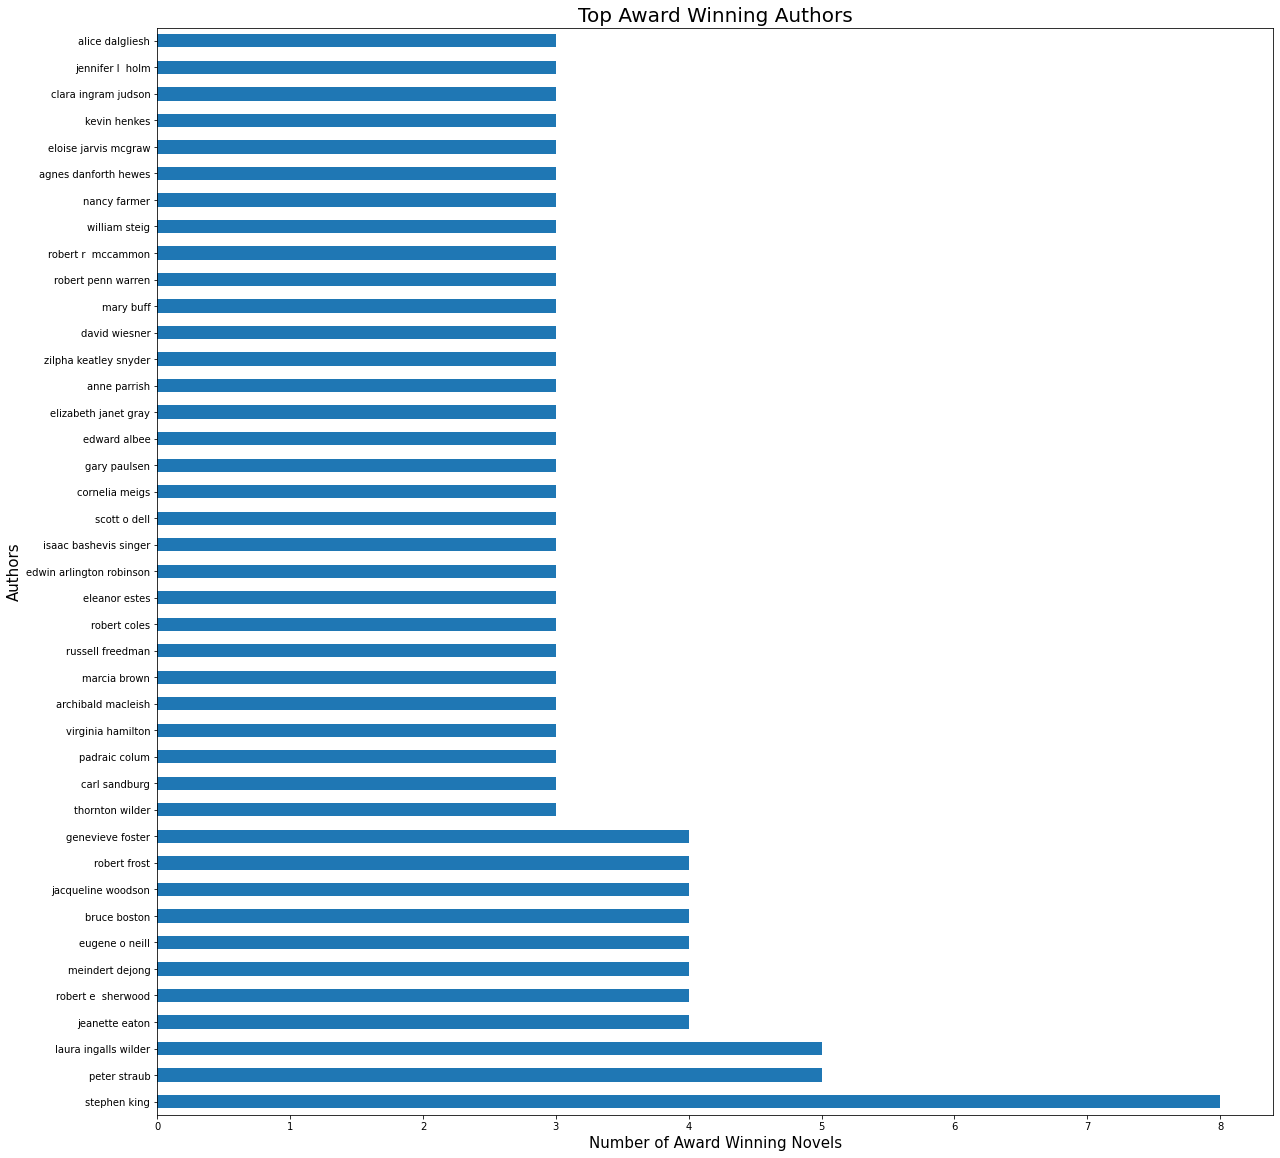

In [109]:
#plotting a horizontal bar chart of top 41 award winning authors
plt.rcParams['figure.figsize'] = (20,20) 
authors_group['authors'].value_counts()[:41].plot(kind='barh')
plt.xlabel('Number of Award Winning Novels', size = 15)
plt.ylabel('Authors', size = 15)
plt.title('Top Award Winning Authors', size = 20)
plt.show()

In [110]:
#Join the web data and the flat file for more visualizations
publishers = pd.read_sql('''SELECT * FROM books_web LEFT JOIN books_flat ON books_flat.title = books_web.title AND books_flat.authors = books_web.authors''', conn)

In [111]:
publishers.head()

,index,title,authors,newberry award winner,caldecott award winner,Pulitzer prize winner for Fiction,Pulitzer prize winner for Non-Fiction,Pulitzer prize winner for Poetry,Pulitzer prize winner for drama,Pulitzer prize winner for biographies,...,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,0,charlotte s web,e b white,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,None,NaN,None,NaN,None,NaN,NaN,NaN,None,None
1,1,ella enchanted,gail carson levine,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,gail carson levine,3.98,0590920685,9.780591e+12,eng,232.0,364091.0,8754.0,9 1 1998,scholastic books
2,2,because of winn dixie,kate dicamillo,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,kate dicamillo,4.04,0439250722,9.780439e+12,eng,182.0,235.0,36.0,3 1 2000,candlewick press
3,3,hatchet,gary paulsen,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,gary paulsen,3.72,0689840926,9.780690e+12,eng,208.0,270244.0,12017.0,4 1 2000,atheneum books for young readers richard jack...
4,4,ramona quimby age 8,beverly cleary,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,None,NaN,None,NaN,None,NaN,NaN,NaN,None,None


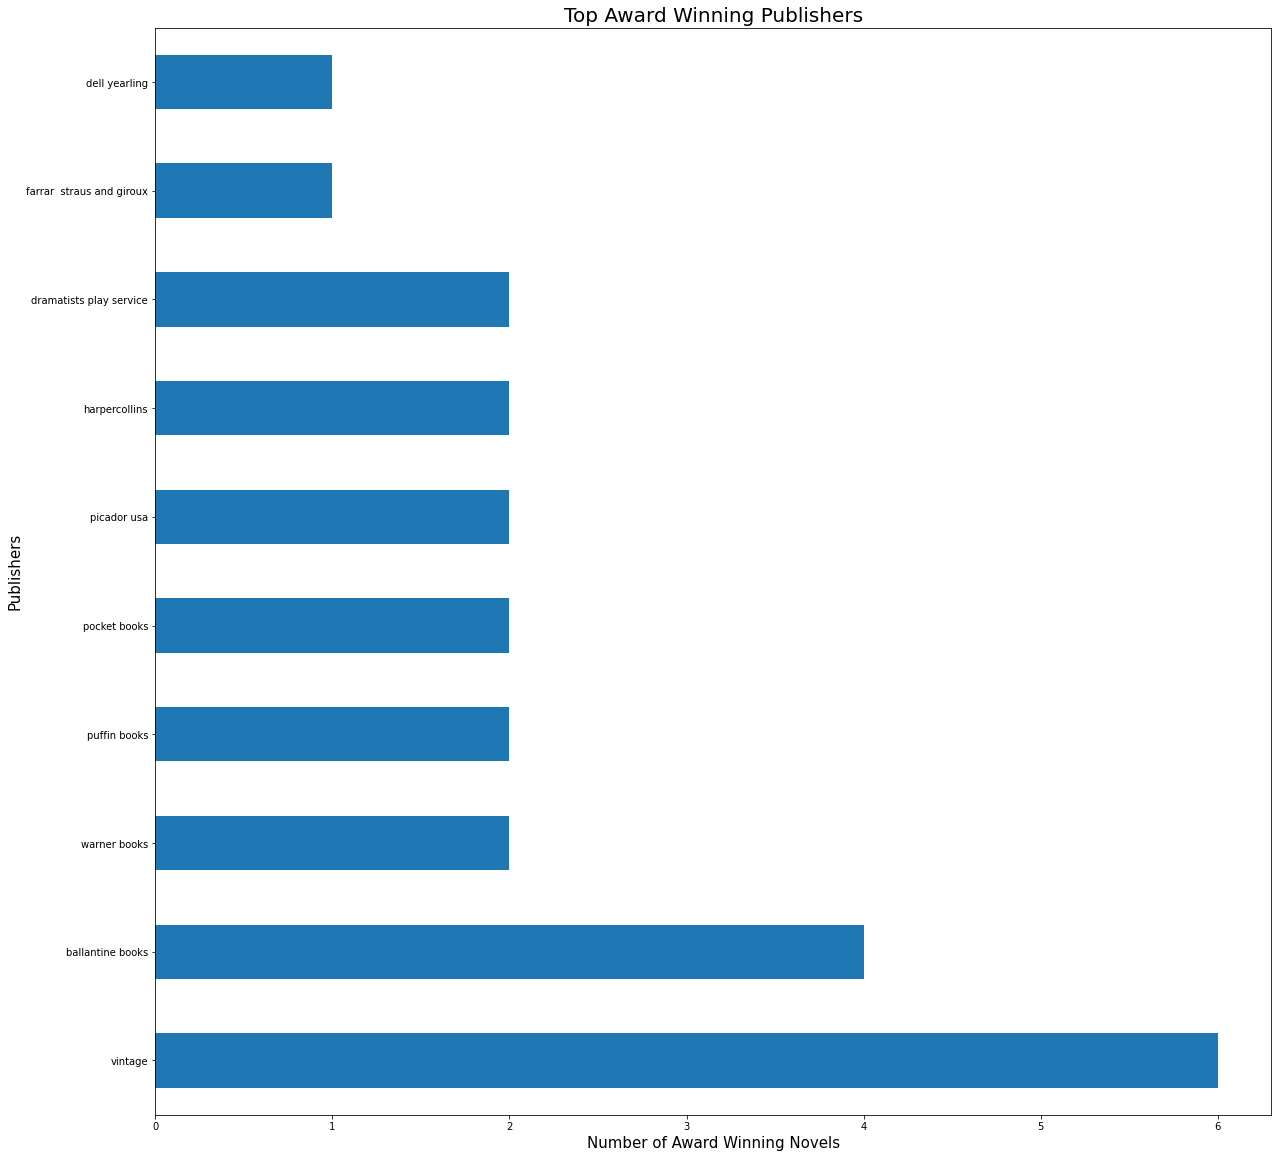

In [112]:
#plotting a horizontal bar chart of top 10 award winning publishers
plt.rcParams['figure.figsize'] = (20,20) 
publishers['publisher'].value_counts()[:10].plot(kind='barh')
plt.xlabel('Number of Award Winning Novels', size = 15)
plt.ylabel('Publishers', size = 15)
plt.title('Top Award Winning Publishers', size = 20)
plt.show()

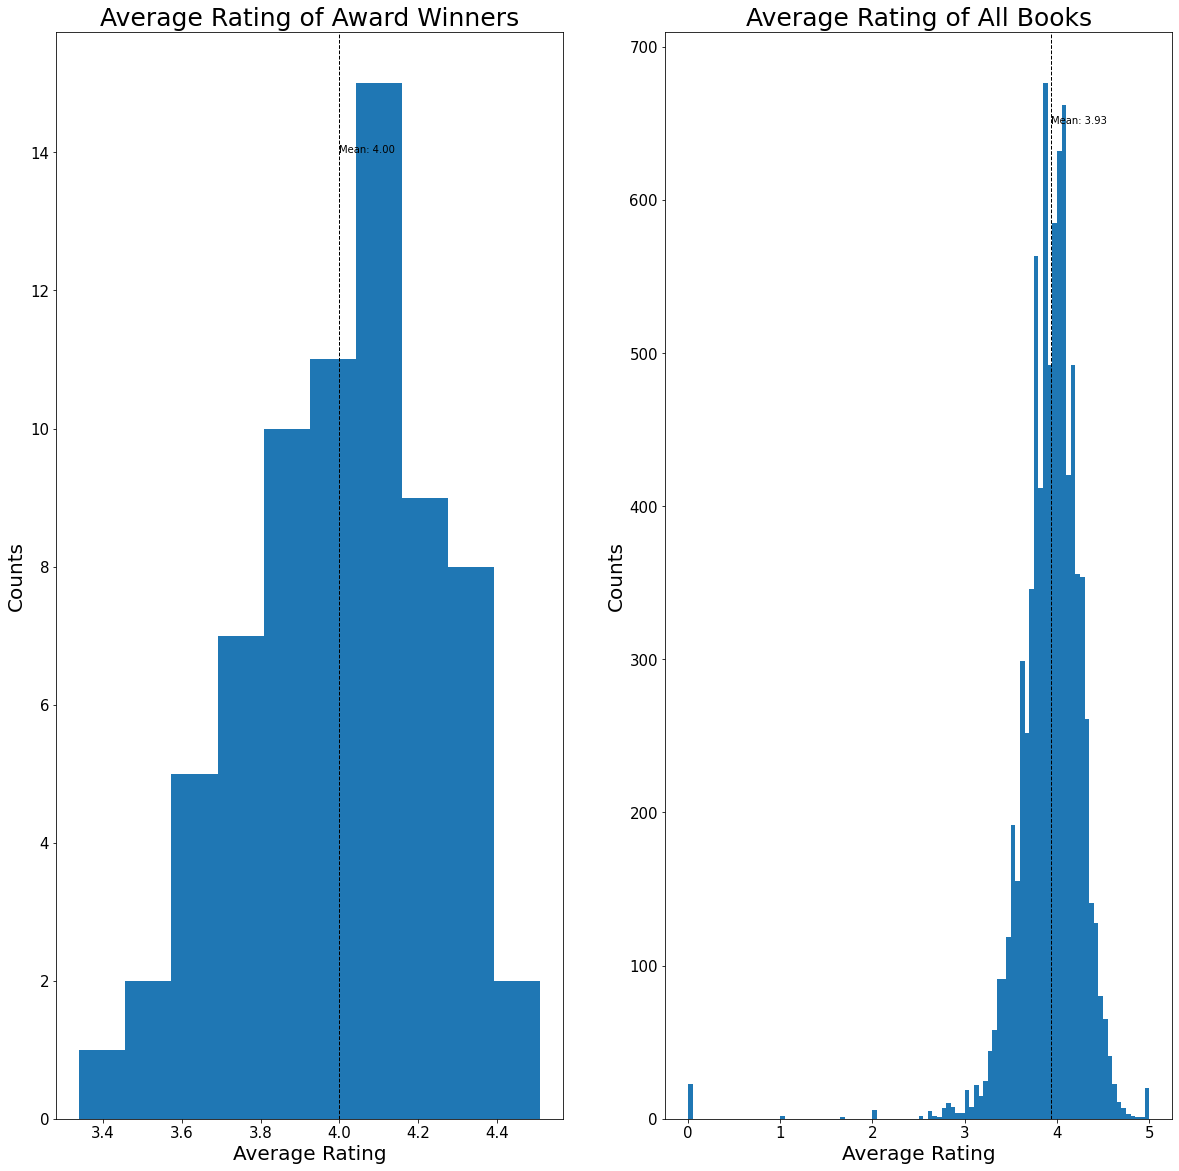

In [113]:
#plotting histograms to compare the award winning novels average ratings vs all the books
fig, axes = plt.subplots(nrows= 1, ncols = 2)
axes[0].hist(publishers['average_rating'])
axes[0].set_title('Average Rating of Award Winners', fontsize = 25)
axes[0].set_xlabel('Average Rating', fontsize = 20)
axes[0].set_ylabel('Counts', fontsize = 20)
axes[0].tick_params(axis='both', labelsize = 15)
axes[0].axvline(publishers['average_rating'].mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
axes[0].text(publishers['average_rating'].mean(), max_ylim*14, 'Mean: {:.2f}'.format(publishers['average_rating'].mean()))

axes[1].hist(books_all_df['average_rating'], bins = 100)
axes[1].set_title('Average Rating of All Books', fontsize = 25)
axes[1].set_xlabel('Average Rating', fontsize = 20)
axes[1].set_ylabel('Counts', fontsize = 20)
axes[1].tick_params(axis='both', labelsize = 15)
axes[1].axvline(books_all_df['average_rating'].mean(), color='k', linestyle='dashed', linewidth=1)
axes[1].text(books_all_df['average_rating'].mean(), max_ylim*650, 'Mean: {:.2f}'.format(books_all_df['average_rating'].mean()))
plt.show()

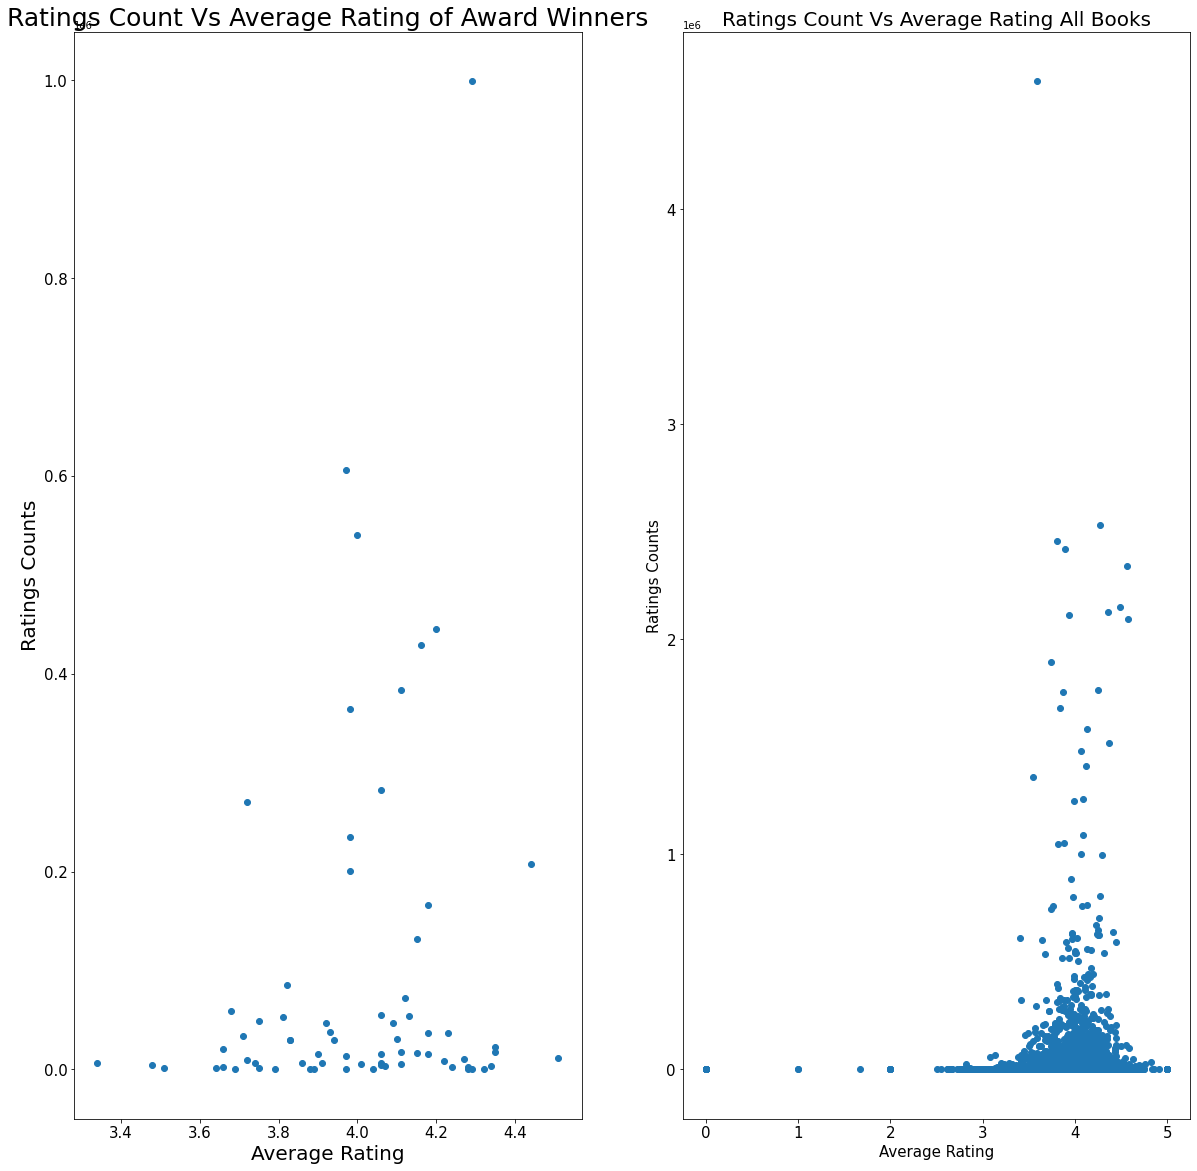

In [114]:
#plotting a scatterplot of the Award winners vs all the books
fig, axes = plt.subplots(nrows= 1, ncols = 2)
axes[0].scatter(publishers['average_rating'], publishers['ratings_count'])
axes[0].set_title('Ratings Count Vs Average Rating of Award Winners', fontsize = 25)
axes[0].set_xlabel('Average Rating', fontsize = 20)
axes[0].set_ylabel('Ratings Counts', fontsize = 20)
axes[0].tick_params(axis='both', labelsize = 15)

axes[1].scatter(books_all_df['average_rating'], books_all_df['ratings_count'])
axes[1].set_xlabel('Average Rating', size = 15)
axes[1].set_ylabel('Ratings Counts', size = 15)
axes[1].set_title('Ratings Count Vs Average Rating All Books', size = 20)
axes[1].tick_params(axis='both', labelsize = 15)
plt.show()

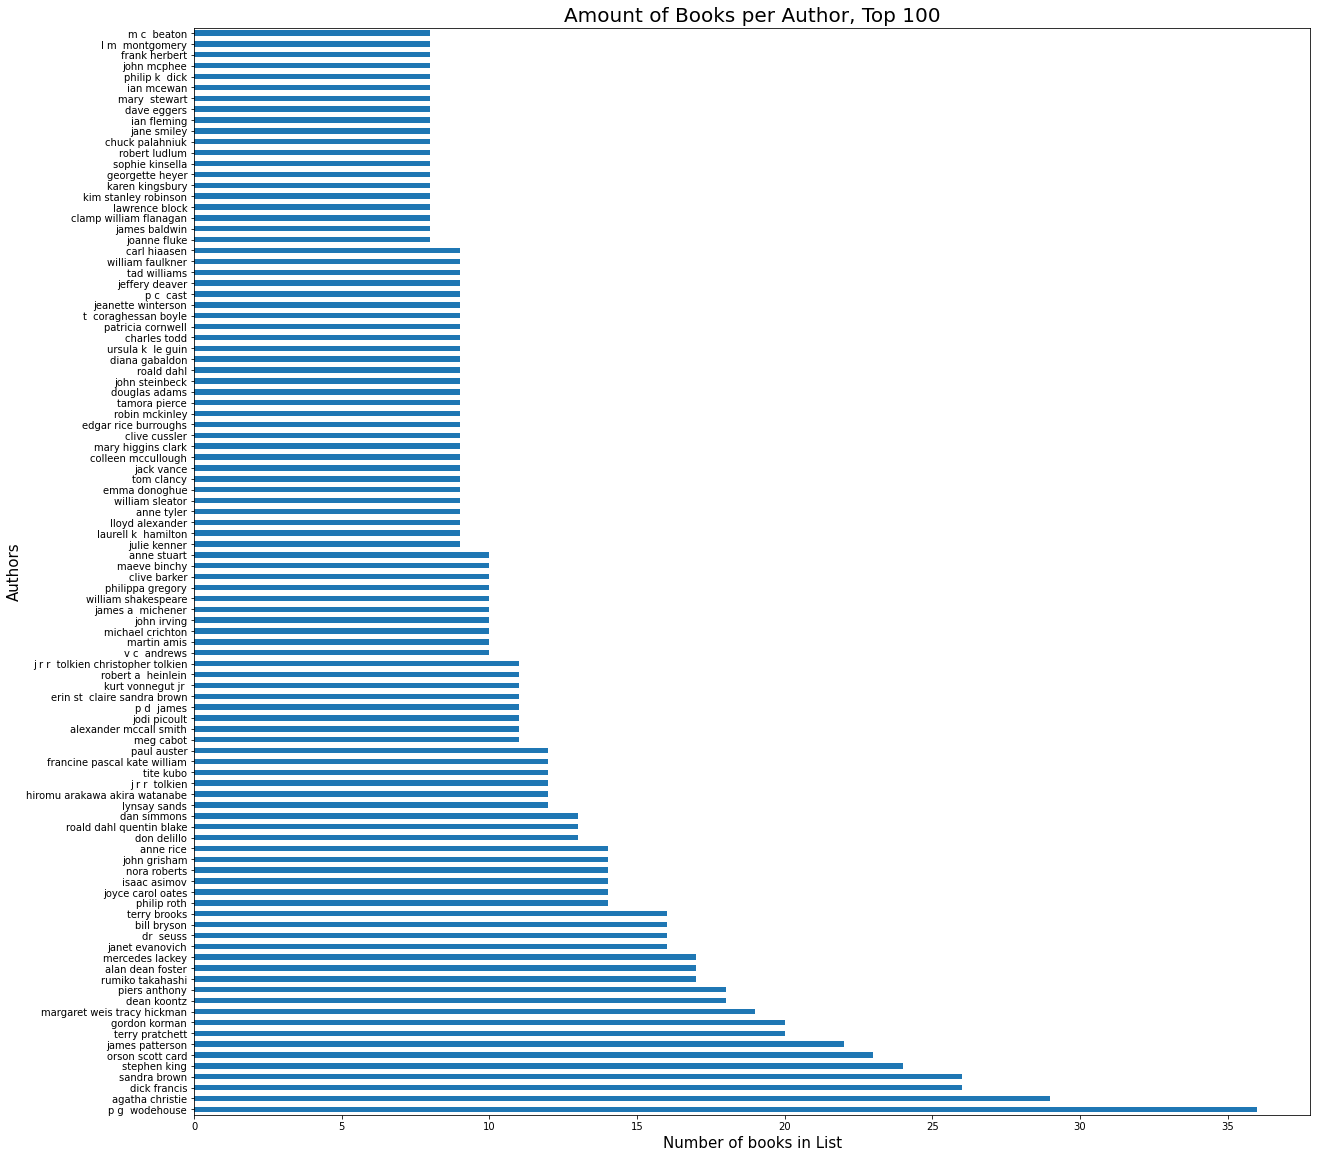

In [115]:
#plotting a horizontal bar chart of the top 100 Authors presented
plt.rcParams['figure.figsize'] = (20,20) 
books_df['authors'].value_counts()[:100].plot(kind='barh')
plt.xlabel('Number of books in List', size = 15)
plt.ylabel('Authors', size = 15)
plt.title('Amount of Books per Author, Top 100', size = 20)
plt.show()

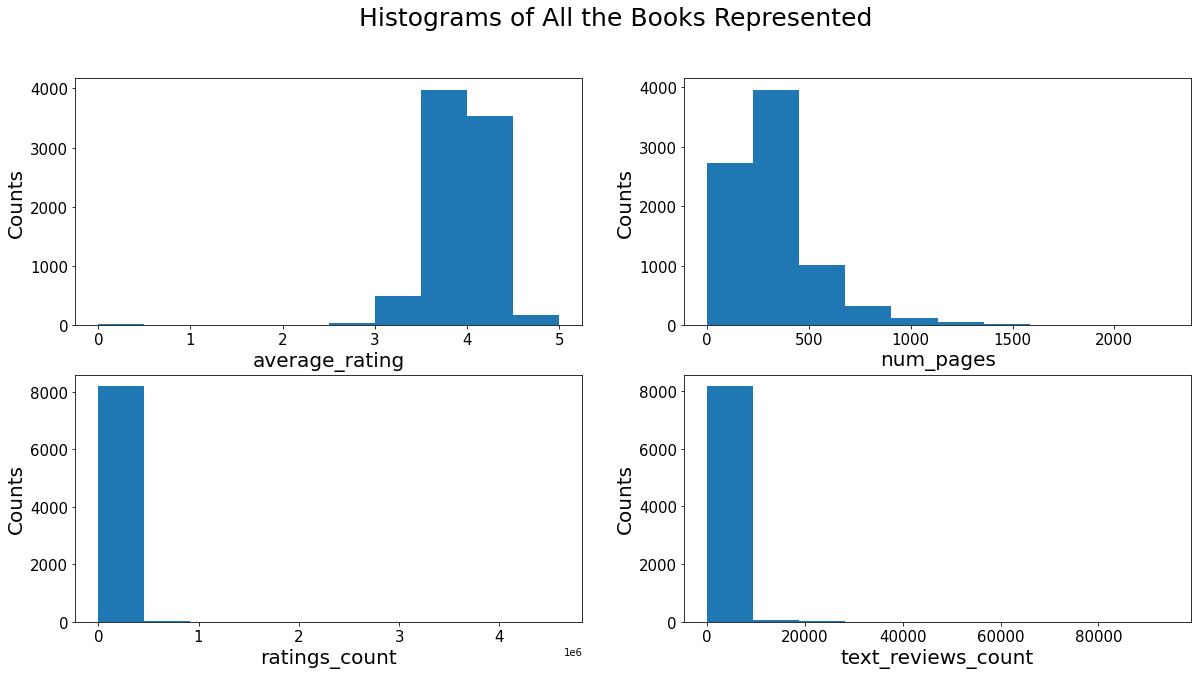

In [116]:
#plotting histograms of all books data
plt.rcParams['figure.figsize'] = (20,10) 
#set up histograms
fig, axes = plt.subplots(nrows= 2, ncols = 2)
num_features = ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']
#draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(books_all_df[num_features[idx]].dropna()) 
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
fig.suptitle('Histograms of All the Books Represented', fontsize=25)
plt.show()